In [1]:
from apts import *
import pandas as pd
%matplotlib inline  

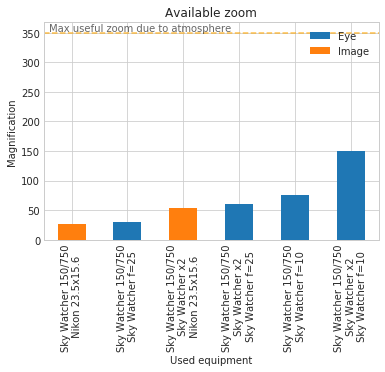

In [2]:
e = Equipment()

sky_watcher = "Sky Watcher"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

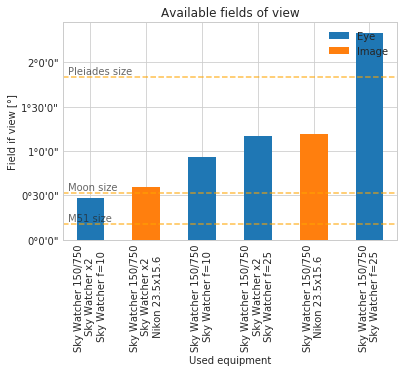

In [3]:
e.plot_fov()

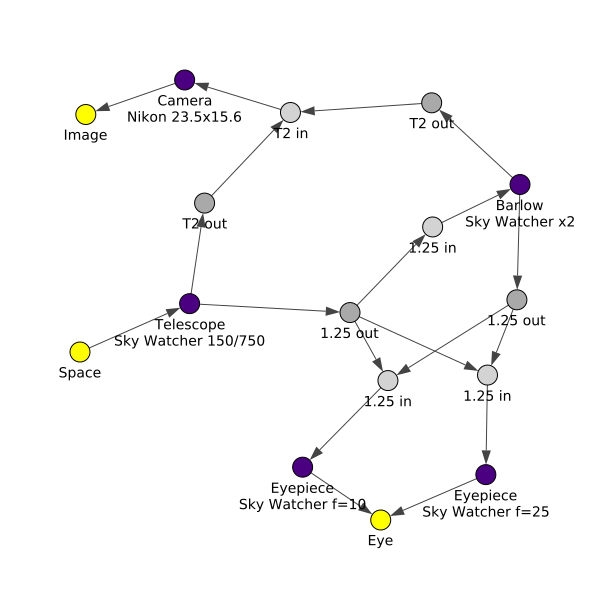

In [4]:
e.plot_connection_graph()

In [5]:
data = e.data()
data[data.Useful== True].sort_values(['Zoom'], ascending=[0])

,ID,Label,Type,Zoom,Useful,FoV,Exit pupil,Dawes' limit,Range,Brightness,Elements
1,1,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=10",Eye,150.00000,True,0.466667,1.0 millimeter,0.773 arcsecond,13.580456,2.040816,3
3,3,"Sky Watcher 150/750, Sky Watcher f=10",Eye,75.00000,True,0.933333,2.0 millimeter,0.773 arcsecond,13.580456,8.163265,2
0,0,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=25",Eye,60.00000,True,1.166667,2.5 millimeter,0.773 arcsecond,13.580456,12.755102,3
4,4,"Sky Watcher 150/750, Sky Watcher x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,0.0 millimeter,0.773 arcsecond,13.580456,16.236939,3
2,2,"Sky Watcher 150/750, Sky Watcher f=25",Eye,30.00000,True,2.333333,5.0 millimeter,0.773 arcsecond,13.580456,51.020408,2
5,5,"Sky Watcher 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,0.0 millimeter,0.773 arcsecond,13.580456,64.947755,2


In [6]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [7]:
place.sunset_time()

datetime.datetime(2018, 8, 17, 19, 56, 25, 943892, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

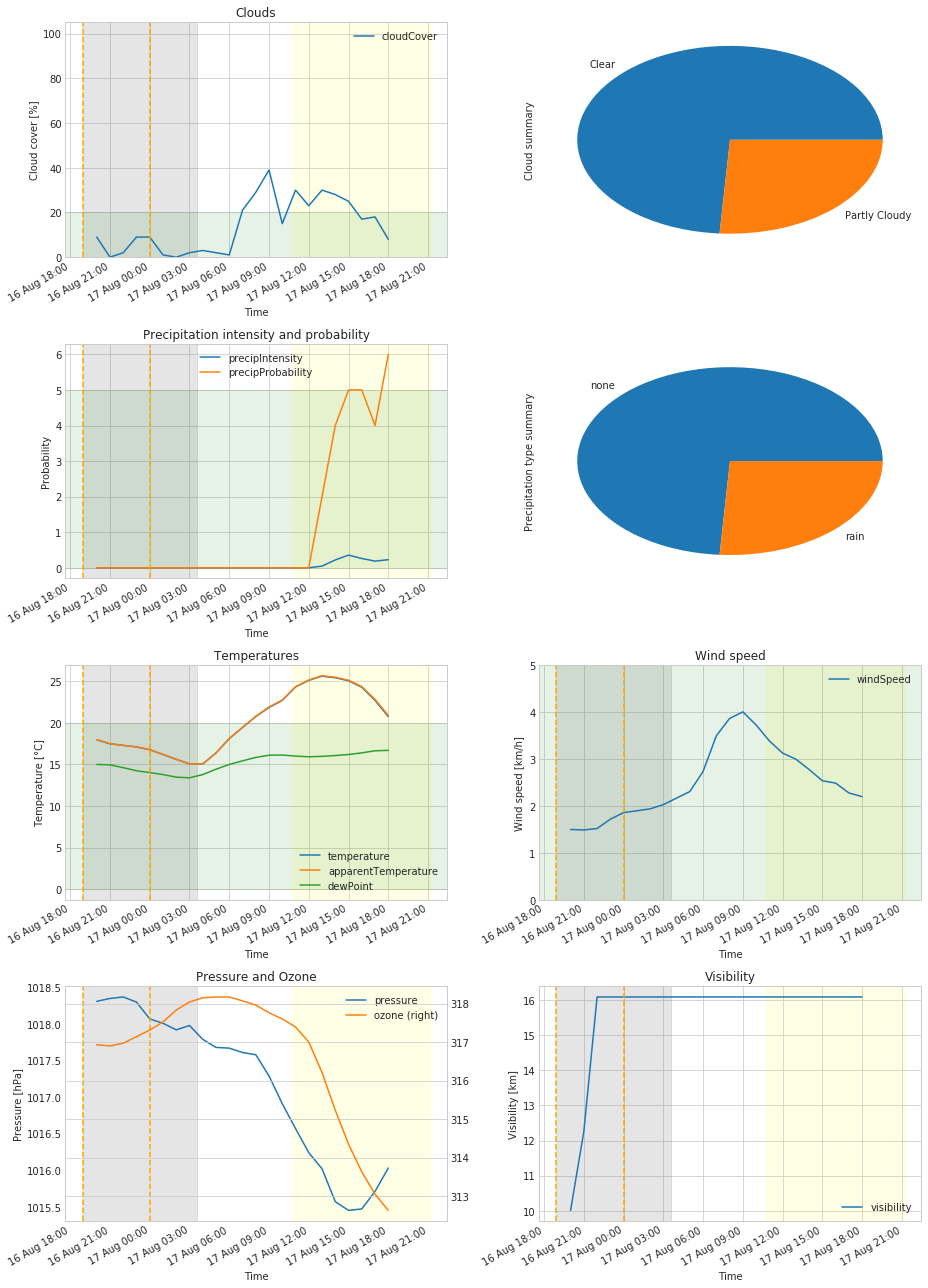

In [8]:
o.plot_weather()

In [9]:
o.is_weather_good()

True

In [10]:
o.place.moon_phase()

31

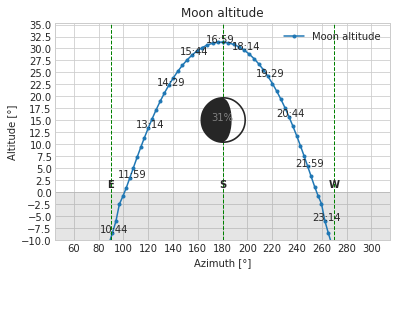

In [11]:
o.place.plot_moon_path()

In [12]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [13]:
o.local_planets.objects

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase
0,"<Mercury ""Mercury"" at 0x7fc63e1d1c88>",Mercury,2018-08-17 11:51:00.686370+02:00,2018-08-17 04:38:29.095591+02:00,2018-08-17 19:04:37.290218+02:00,54.047724,1.93,8.884424,14.200024,0.697313,9.665668,-13.122945,10.894415
1,"<Venus ""Venus"" at 0x7fc63e1d1e10>",Venus,2018-08-17 15:33:34.111424+02:00,2018-08-17 09:56:28.268914+02:00,2018-08-17 21:09:34.986287+02:00,34.288202,-4.26,12.603864,-5.571250,0.686025,24.663839,45.925987,48.750744
2,"<Mars ""Mars"" at 0x7fc63d5b7048>",Mars,2018-08-17 23:07:30.908746+02:00,2018-08-17 19:30:09.241376+02:00,2018-08-17 02:49:23.717316+02:00,13.402438,-2.53,20.190356,-26.498822,0.405880,23.060982,153.609406,97.299377
3,"<ephem.Jupiter ""Jupiter"" at 0x7fc63e20c1a0>",Jupiter,2018-08-17 17:49:53.192308+02:00,2018-08-17 13:04:51.058447+02:00,2018-08-17 22:34:50.949685+02:00,24.277788,-1.86,14.882052,-15.593559,5.456271,36.057590,80.725113,99.132301
4,"<ephem.Saturn ""Saturn"" at 0x7fc63e20c310>",Saturn,2018-08-17 21:08:46.348937+02:00,2018-08-17 17:05:10.067612+02:00,2018-08-17 01:16:27.393556+02:00,17.233588,0.29,18.205893,-22.653716,9.409327,17.599558,128.010361,99.842728
5,"<Uranus ""Uranus"" at 0x7fc63d5b71d0>",Uranus,2018-08-17 05:01:09.601655+02:00,2018-08-17 21:56:30.436655+02:00,2018-08-17 12:01:51.460620+02:00,51.679127,5.76,2.034865,11.830396,19.481577,3.617828,-111.663628,99.943939
6,"<Neptune ""Neptune"" at 0x7fc63d5b7358>",Neptune,2018-08-17 02:08:17.432533+02:00,2018-08-17 20:33:25.338857+02:00,2018-08-17 07:39:09.674838+02:00,33.291312,7.82,23.145819,-6.569030,28.997105,2.355201,-158.394333,99.996124


In [14]:
o.get_visible_planets()

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase,ID
4,"<ephem.Saturn ""Saturn"" at 0x7fc63e20c310>",Saturn,2018-08-17 21:08:46.348937+02:00,2018-08-17 17:05:10.067612+02:00,2018-08-17 01:16:27.393556+02:00,17.233588,0.29,18.205893,-22.653716,9.409327,17.599558,128.010361,99.842728,4


In [15]:
o.plot_visible_planets()

In [16]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude,ID


In [17]:
o.plot_messier()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)